In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pycaret

     |████████████████████████████████| 264 kB 15.7 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |████████████████████████████████| 111 kB 75.3 MB/s 
     |████████████████████████████████| 271 kB 65.2 MB/s 
     |████████████████████████████████| 14.6 MB 80.7 MB/s 
     |████████████████████████████████| 1.3 MB 68.0 MB/s 
     |████████████████████████████████| 2.0 MB 43.8 MB/s 
     |████████████████████████████████| 167 kB 62.6 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 248 kB 76.0 MB/s 
     |████████████████████████████████| 1.7 MB 17.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 68.5 MB/s 
     |████████████████████████████████| 102 kB 74.8 MB/s 
     |████████████████████████████████| 3.1 MB 79.2 MB/s 
     |███████████████

In [4]:
import pandas as pd
from pycaret.classification import *

In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/data/voted/train.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/data/voted/test_x.csv', index_col=0)
submission = pd.read_csv('/content/drive/MyDrive/data/voted/sample_submission.csv', index_col=0)

In [6]:
# pycaret을 이용한 AutoML 환경 설정
temp = setup(train_data, target = 'voted')

,Description,Value
0,session_id,8281
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 77)"
5,Missing Values,False
6,Numeric Features,41
7,Categorical Features,35
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6930,0.7650,0.6365,0.7643,0.6945,0.3911,0.3978,11.442
lightgbm,Light Gradient Boosting Machine,0.6927,0.7658,0.6431,0.7597,0.6965,0.3895,0.3952,0.684
ridge,Ridge Classifier,0.6913,0.0000,0.6628,0.7459,0.7018,0.3840,0.3870,0.064
lda,Linear Discriminant Analysis,0.6912,0.7621,0.6625,0.7460,0.7017,0.3840,0.3870,0.718
ada,Ada Boost Classifier,0.6896,0.7567,0.6549,0.7477,0.6982,0.3816,0.3852,2.257
et,Extra Trees Classifier,0.6894,0.7603,0.6435,0.7542,0.6944,0.3827,0.3878,4.375
rf,Random Forest Classifier,0.6885,0.7564,0.6377,0.7561,0.6918,0.3815,0.3873,4.613
dt,Decision Tree Classifier,0.6160,0.6121,0.6524,0.6490,0.6507,0.2243,0.2244,0.818
lr,Logistic Regression,0.5484,0.5723,0.9910,0.5488,0.7064,0.0025,0.0146,2.364
knn,K Neighbors Classifier,0.5131,0.5077,0.5634,0.5551,0.5592,0.0154,0.0154,15.639


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8281, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
gbc = create_model('gbc')
lightgbm = create_model('lightgbm')
et = create_model('et')
blender = blender_specific = blend_models(estimator_list = [gbc,lightgbm,et], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6935,0.7690,0.6413,0.7621,0.6965,0.3916,0.3976
1,0.7014,0.7706,0.6527,0.7678,0.7056,0.4066,0.4122
2,0.6847,0.7562,0.6371,0.7500,0.6890,0.3735,0.3786
3,0.7044,0.7776,0.6365,0.7837,0.7025,0.4150,0.4239
4,0.6928,0.7684,0.6531,0.7536,0.6998,0.3886,0.3927
5,0.6865,0.7550,0.6342,0.7548,0.6893,0.3778,0.3836
6,0.6988,0.7737,0.6422,0.7701,0.7004,0.4025,0.4092
7,0.7101,0.7801,0.6474,0.7860,0.7100,0.4255,0.4335
8,0.6941,0.7625,0.6430,0.7620,0.6975,0.3925,0.3983
9,0.6985,0.7710,0.6327,0.7761,0.6971,0.4030,0.4114


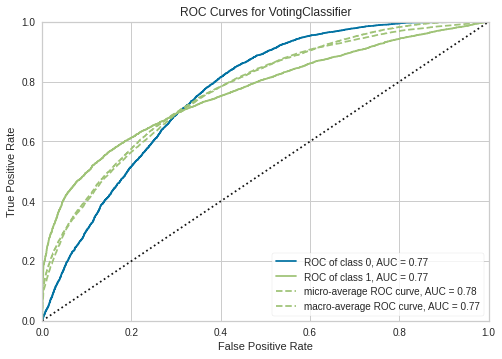

In [9]:
plot_model(estimator=blender, plot='auc')

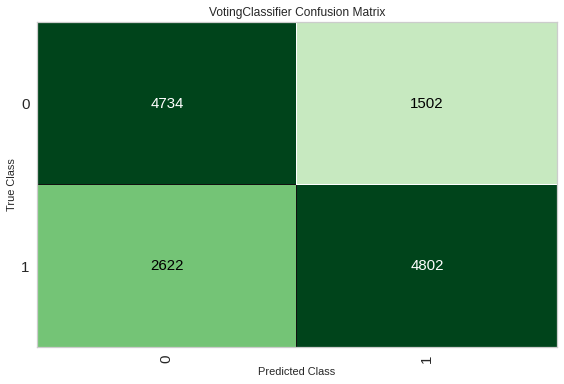

In [10]:
plot_model(estimator=blender, plot='confusion_matrix')

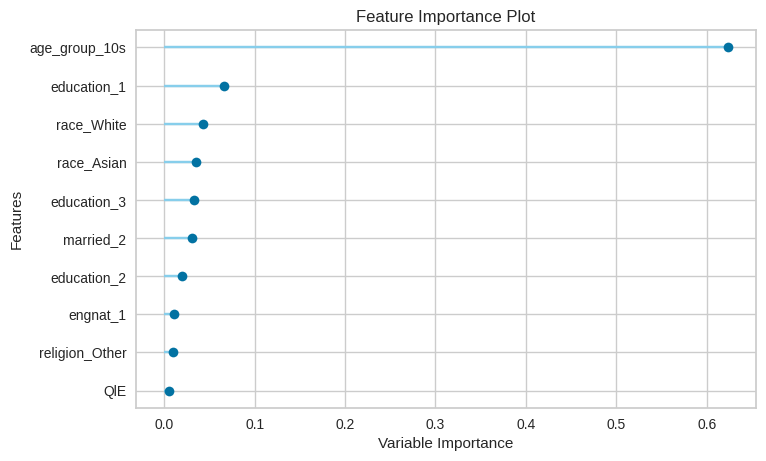

In [11]:
plot_model(estimator=gbc, plot='feature')

In [12]:
model = finalize_model(blender)

In [13]:
predictions = predict_model(model, data = test_data)

In [14]:
print(predictions)

       QaA  QaE  QbA   QbE  QcA  ...  wr_11  wr_12  wr_13  Label   Score
index                            ...                                    
0      3.0  736  2.0  2941  3.0  ...      0      1      1      2  0.6879
1      3.0  514  2.0  1952  3.0  ...      0      0      0      2  0.8865
2      3.0  500  2.0  2507  4.0  ...      0      1      1      1  0.5306
3      1.0  669  1.0  1050  5.0  ...      1      1      1      1  0.7753
4      2.0  499  1.0  1243  5.0  ...      1      1      1      2  0.7321
...    ...  ...  ...   ...  ...  ...    ...    ...    ...    ...     ...
11378  5.0  427  5.0  1066  5.0  ...      0      1      1      1  0.6073
11379  1.0  314  5.0   554  5.0  ...      1      1      1      2  0.8611
11380  1.0  627  2.0   799  1.0  ...      0      1      1      1  0.7341
11381  2.0  539  1.0  2090  2.0  ...      1      1      0      1  0.6127
11382  2.0  541  4.0   900  5.0  ...      1      0      0      2  0.6150

[11383 rows x 78 columns]


In [15]:
submission['voted'] = predictions['Label']

In [16]:
submission.to_csv('/content/drive/MyDrive/data/voted/submission.csv')